# Notebook to create examplary plots

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Adjust path if the package is not installed
import sys
sys.path.append('.')  # Assumes root contains battery_ocv_toolbox/
# Import the package
from ocv_teaching import OCV, ActiveMaterial, OCVBlending, CellOCVReconstruction

## Load data

In [5]:
NCM811_df = pd.read_csv('ocv_data/NMC811_half_cell_ocv.csv')
Graphite_df = pd.read_csv('ocv_data/Graphite_half_cell_ocv.csv')
LFP_df = pd.read_csv('ocv_data/LFP_half_cell_ocv.csv')
Si_df = pd.read_csv('ocv_data/Silicon_half_cell_ocv.csv')

## 2. Instantiate OCV and ActiveMaterial objects 

In [ ]:
NCM811_ocv = OCV(NCM811_df["SOC"], NCM811_df["Voltage"], NCM811_df["Voltage"])
Graphite_ocv = OCV(Graphite_df["SOC"], Graphite_df["Voltage"], Graphite_df["Voltage"])
LFP_ocv = OCV(LFP_df["SOC"], LFP_df["Voltage"], LFP_df["Voltage"])
Silicon_ocv = OCV(Silicon_df["SOC"], Silicon_df["Voltage"], Silicon_df["Voltage"])

NCM811_mat = ActiveMaterial(NCM811_ocv, specific_capacity=212, formation_loss=0.09)
Graphite_mat = ActiveMaterial(Graphite_ocv, specific_capacity=372, formation_loss=0.08)
LFP_mat = ActiveMaterial(LFP_ocv, specific_capacity=2.5, formation_loss=0.07)
Silicon_mat = ActiveMaterial(Silicon_ocv, specific_capacity=2.5, formation_loss=0.12)


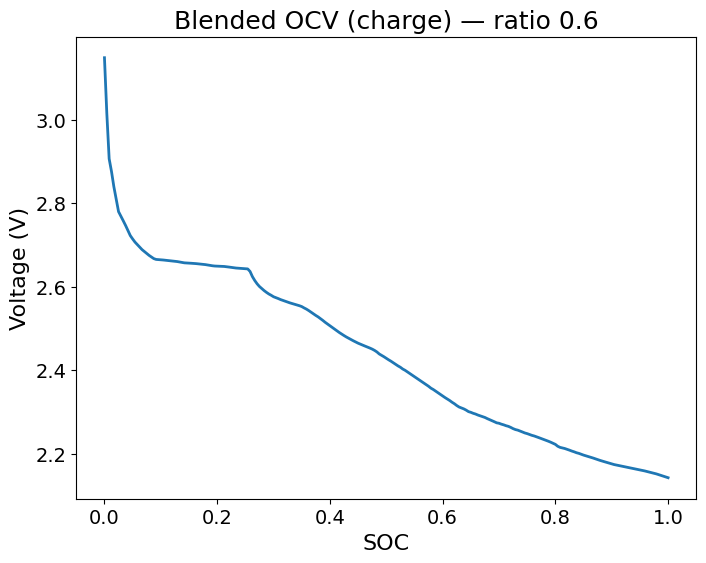

AttributeError: 'ActiveMaterial' object has no attribute 'get_voltage'

In [ ]:
"""
Example script demonstrating how to use the `battery_ocv_toolbox` package:
 1. Load OCV data from CSV files
 2. Instantiate OCV and ActiveMaterial objects
 3. Perform OCV blending
 4. Reconstruct full-cell OCV
 5. Plot results
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Adjust path if the package is not installed
import sys
sys.path.append('.')  # Assumes root contains battery_ocv_toolbox/
# Import the package
from ocv_teaching import OCV, ActiveMaterial, OCVBlending, CellOCVReconstruction

# --- 1. Load OCV data ---
# CSV files should have columns: soc, voltage_charge, voltage_discharge
NCM811_df = pd.read_csv('ocv_data/NMC811_half_cell_ocv.csv')
Graphite_df = pd.read_csv('ocv_data/Graphite_half_cell_ocv.csv')

soc_NCM811 = NCM811_df["SOC"].values
v_NCM811_charge = NCM811_df['Voltage'].values
v_NCM811_discharge = NCM811_df['Voltage'].values

soc_Graphite = Graphite_df['SOC'].values
v_Graphite_charge = Graphite_df['Voltage'].values
v_Graphite_discharge = Graphite_df['Voltage'].values

soc_Graphite2 = Graphite_df['SOC'].values
v_Graphite_charge2 = Graphite_df['Voltage'].values
v_Graphite_discharge2 = Graphite_df['Voltage'].values

# --- 2. Instantiate OCV and ActiveMaterial objects ---
NCM811_ocv = OCV(soc_NCM811, v_NCM811_charge, v_NCM811_discharge)
Graphite_ocv = OCV(soc_Graphite, v_Graphite_charge, v_Graphite_discharge)

NCM811_mat = ActiveMaterial(NCM811_ocv, specific_capacity=2.5, formation_loss=0.02)
Graphite_mat = ActiveMaterial(Graphite_ocv, specific_capacity=2.5, formation_loss=0.10)

# --- 3. Blend OCV curves ---
blend_ratio = 0.6  # 60% NCM811itive material
blender = OCVBlending(NCM811_mat, Graphite_mat, cap_ratio=blend_ratio)
soc_blend, v_blend = blender.blend(mode='charge')

# Plot blended OCV
plt.figure()
plt.plot(soc_blend, v_blend)
plt.xlabel('SOC')
plt.ylabel('Voltage (V)')
plt.title(f'Blended OCV (charge) — ratio {blend_ratio}')
plt.show()

# --- 4. Reconstruct full-cell OCV ---
np_ratio = 1.1
cell = CellOCVReconstruction(NCM811_mat, Graphite_mat, np_ratio=np_ratio)
soc_cell, v_cell = cell.reconstruct(mode='charge')

# Plot full-cell reconstruction
plt.figure()
plt.plot(soc_cell, v_cell)
plt.xlabel('Full-Cell SOC')
plt.ylabel('Cell Voltage (V)')
plt.title(f'Full-Cell OCV Reconstruction (charge) — N:P {np_ratio}')
plt.show()

# --- 5. Save outputs if desired ---
np.savetxt('output/blended_ocv.csv', np.vstack([soc_blend, v_blend]).T,
           header='soc,voltage', delimiter=',', comments='')
np.savetxt('output/cell_ocv.csv', np.vstack([soc_cell, v_cell]).T,
           header='soc,voltage', delimiter=',', comments='')
